# Modelling & Evaluating

## Objectives

* Answer business requirement 2:
    - The client is interested to tell wheterh a given leaf is covered with powdery mildew

## Inputs

* Image shape embeddings (pickle file).

* Images from the test, train, validation folders and their subfolders.

    ├── inputs
    │   └──cherryleaves_dataset 
    │      └──cherry-leaves
    │           │
    │           ├── test
    │           │   ├── healthy
    │           │   └── powdery_mildew
    │           │
    │           ├── train
    │           │   ├── healthy
    │           │   └── powdery_mildew
    │           │
    │           └── validation
    │               ├── healthy
    │               └── powdery_mildew
    └──

## Outputs

* Images distribution plot in train, validation, and test set.
    - label distribution - bar chart.
    - set distriburion - pie chart.

* Image augmentation.
    - plot augmented images for each set.

* Class indices to change prediction inference in labels.

* Creation of a Machine learning model and display of its summary.

* Model training.

* Save model.

* Learning curve plot for model performance.
    - Model A - separate plots for accuracy and loss.
    - Model B - comprehensive model history plot.
    - Model C - plot model history with plotly.

* Model evaluation on saved file.
    - Calculate accuracy.
    - Plot ROC curve.
    - Calculate classification report (Model A)
        - Model B - classification report with macro avg and weighted avg
        - Model C - syntetic classification report per label
* Plot Confusion Matrix
* Save evaluation pickle file
* Prediction on the random image file.

## Comments | Insights | Conclusions

* The same data was plotted in different versions to accommodate potential client requests for deeper insights.

* The CNN was designed to maximize accuracy while minimizing both loss and training time.

* It was intentionally kept as compact as possible without compromising accuracy, while also preventing overfitting.

* Further details on hyperparameter optimization and the trial-and-error phase are documented in the README.md file and in a separate PDF.

---

# Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread

2025-10-03 18:34:39.835143: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-03 18:34:39.877747: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

# Set working directory

In [2]:
cwd = os.getcwd()

In [3]:
os.chdir('/workspaces/Cherry-Powdery-Mildew-Detector')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspaces/Cherry-Powdery-Mildew-Detector'

# Set input directory

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

# Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


# Set Label names

In [9]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


# Set image shape

In [10]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Images distribution

## Count number of images per set and label

In [20]:
import os
import pandas as pd
import plotly.express as px
import importlib.util

rows = []
for folder in ['train', 'test', 'validation']:
    for label in labels:
        count = len(os.listdir(os.path.join(my_data_dir, folder, label)))
        rows.append({
            'Set': folder,
            'Label': label,
            'Count': count
        })
        print(f"* {folder} - {label}: {count} images")

df_freq = pd.DataFrame(rows)
print("\n")


* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images




## Label Distribution - Bar Chart

In [22]:
fig = px.bar(df_freq, 
            x="Set", 
            y="Count", 
            color='Label', 
            title="Cherry Leaves Dataset", 
            text_auto=True)
fig.update_layout(
    autosize=False,
    width=800, 
    height=500, 
    )
fig.show()
fig.write_html(f'{file_path}/number_leaves_sets.html')


## Set Distribution - Pie Chart

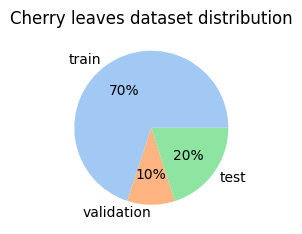

In [14]:
folders = os.listdir(my_data_dir)
data=[]
for folder in folders:
    for label in labels:
        n=int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
        n+=n
    data.append(n)

px = 1/plt.rcParams['figure.dpi'] 
plt.subplots(figsize=(800*px, 250*px))
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = folders, colors = colors, autopct='%.0f%%')
plt.title('Cherry leaves dataset distribution')
plt.savefig(f'{file_path}/sets_distribution_pie.png',
            bbox_inches='tight', dpi=150)
plt.show()